# Import Packages and Reading of Data

In [32]:
import time
import warnings
import pickle
import shap

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold
from xgboost import plot_importance
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [33]:
# Reading of Excel
train_metadata = pd.read_csv('train_dataset.csv')
test_metadata = pd.read_csv('test_dataset.csv')

In [34]:
train_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,0,-0.058996,-0.101765,-0.375390,-0.064435,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,1
1,0,0,0,-0.058509,-0.061982,-0.024002,-0.064274,1,-0.277500,0,-1.193893,0,-0.264936,-0.226362,0,1,0,0
2,0,0,1,-0.058917,-0.092427,-0.206857,-0.062335,1,0.094003,0,0.467797,0,-0.264936,-0.226362,0,1,1,0
3,0,0,1,-0.057353,0.078232,-0.321707,-0.059427,1,1.580014,0,0.098533,0,6.295222,-0.226362,1,1,1,0
4,0,0,1,-0.058873,-0.094191,-0.207697,-0.064112,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16226,0,1,1,0.183041,2.307269,0.000665,-0.002560,1,1.580014,1,0.652429,0,-0.264936,-0.226362,1,1,1,1
16227,0,0,1,-0.058544,-0.093461,-0.219648,-0.057004,1,-0.277500,0,1.390958,0,-0.264936,-0.226362,0,1,0,0
16228,0,0,1,-0.058863,-0.095256,-0.194927,-0.062820,1,1.208511,0,0.652429,0,-0.264936,-0.226362,0,1,1,0
16229,0,0,0,-0.058952,-0.071228,-0.375411,-0.064274,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,1


In [35]:
test_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,1,-0.058983,-0.100670,-0.376092,-0.063789,1,0.094003,1,-0.086100,0,-0.264936,-0.226362,0,1,0,0
1,0,0,1,-0.058989,-0.103012,-0.357559,-0.063466,1,-0.277500,1,1.206326,0,-0.264936,-0.226362,0,1,1,0
2,0,0,1,-0.058999,-0.105992,-0.292224,-0.064435,1,1.208511,1,1.206326,0,-0.264936,-0.226362,0,1,1,0
3,0,0,1,-0.058434,-0.075790,-0.296583,-0.059750,1,-0.649002,0,1.390958,1,1.375103,-0.226362,0,1,1,0
4,0,0,0,-0.046815,-0.021621,2.165586,-0.013061,1,1.580014,1,-1.563157,0,1.375103,-0.226362,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,0,0,0,-0.058997,-0.100578,-0.375454,-0.064435,1,-0.649002,0,-0.455364,0,-0.264936,-0.226362,0,1,1,1
4054,0,0,1,-0.058892,-0.086253,-0.217617,-0.063789,1,-0.277500,0,-1.193893,0,-0.264936,-0.226362,0,1,0,0
4055,0,0,1,-0.058947,-0.084458,-0.365236,-0.062335,1,0.465506,0,0.098533,0,3.015143,-0.226362,0,1,0,0
4056,0,0,1,-0.058681,-0.097932,-0.282102,-0.020977,1,-1.020505,0,0.098533,0,-0.264936,-0.226362,0,1,1,1


In [36]:
x_train = train_metadata.drop(columns = "isBot")
x_test = test_metadata.drop(columns = "isBot")
y_train = train_metadata["isBot"]
y_test = test_metadata["isBot"]

# Models
1. Logistic Regression
2. Support Vector Classifier
3. Random Forest Classifier
4. Adaboost Classifer
5. XGBoost Classifier

## 05 XGBoost Classifier
* Model (Grid Search + Bayesian Optimisation)
* Error Metrics
* Plot for Feature Importance

### Model (Grid Search)

In [37]:
weight_train = y_train.value_counts()[0] / y_train.value_counts()[1]

In [38]:
xgb_search = XGBClassifier(scale_pos_weight = weight_train,
                           gamma = 0.1,
                           alpha = 0.5,
                           objective = "binary:logistic",
                           eval_metric = "logloss")

grid_xgb = {"max_depth": [5, 10, 15, 20, 25], 
            "subsample": [0.6, 0.8, 1.0], 
            "eta": [0.01, 0.1, 0.5], 
            "colsample_bytree": [0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(estimator = xgb_search,
                           param_grid = grid_xgb,
                           scoring = 'f1',
                           n_jobs = -1,
                           cv = 5,
                           verbose = 2)

In [39]:
%%time

results_grid_xgb = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 9.18 s, sys: 738 ms, total: 9.92 s
Wall time: 8h 40min 2s


In [40]:
print('Best Score: %s' % results_grid_xgb.best_score_)
print('Best Hyperparameters: %s' % results_grid_xgb.best_params_)

Best Score: 0.8766487726233239
Best Hyperparameters: {'colsample_bytree': 0.8, 'eta': 0.1, 'max_depth': 10, 'subsample': 0.8}


In [41]:
%%time

# y_prediction for the best model using GridSearchCV
y_pred_grid = results_grid_xgb.predict(x_test)

CPU times: user 44.3 ms, sys: 7.09 ms, total: 51.4 ms
Wall time: 28.7 ms


In [42]:
# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred_grid)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred_grid)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred_grid)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred_grid)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_grid)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_grid)
print(f'Recall: {recall}')

Accuracy: 0.9312469196648595
Log Loss: 2.478112197033929
ROC AUC: 0.9058930857086596
F1-score: 0.8700512342803912
Precision: 0.8903717826501429
Recall: 0.8506375227686703


### Model (Bayesian Optimisation)

In [44]:
def xgboost_hyper_pram(eta, max_depth, subsample, gamma, colsample_bytree, alpha):
    max_depth = int(max_depth)
    xgb_classifier = XGBClassifier(max_depth = max_depth, 
                                   eta = eta, 
                                   gamma = gamma,
                                   subsample = subsample,
                                   colsample_bytree = colsample_bytree,
                                   alpha = alpha,
                                   scale_pos_weight = weight_train,
                                   objective = "binary:logistic",
                                   eval_metric = "logloss")
    
    cross_val = cross_val_score(xgb_classifier, x_train, y_train, cv = 5, scoring = 'f1')
    
    return (np.mean(cross_val))

In [45]:
optim_model = BayesianOptimization(xgboost_hyper_pram, 
                                   {'max_depth' : (1, 30), 
                                   'eta' : (0, 0.2), 
                                   'gamma' : (0, 1),
                                   'subsample' : (0, 1),
                                   'colsample_bytree' : (0, 1),
                                   'alpha' : (0, 1)},
                                   random_state = 101)

In [46]:
%%time 

optim_model.maximize(n_iter = 15, init_points = 25, acq='ei')

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.8719    | 0.5164    | 0.5707    | 0.005695  | 0.1715    | 20.87     | 0.8339    |
| 2         | 0.874     | 0.307     | 0.8936    | 0.1443    | 0.1899    | 17.07     | 0.3521    |
| 3         | 0.8604    | 0.1819    | 0.7856    | 0.1931    | 0.2324    | 3.423     | 0.6035    |
| 4         | 0.8196    | 0.729     | 0.2762    | 0.1371    | 0.5179    | 2.406     | 0.1379    |
| 5         | 0.8722    | 0.187     | 0.9943    | 0.1041    | 0.5788    | 22.31     | 0.542     |
| 6         | 0.8739    | 0.9132    | 0.8079    | 0.0806    | 0.3572    | 28.63     | 0.3436    |
| 7         | 0.8546    | 0.8651    | 0.8303    | 0.1076    | 0.9225    | 3.817     | 0.1028    |
| 8         | 0.8706    | 0.7015    | 0.8905    | 0.03191   | 0.2756    | 20.5      | 0.1643    |
| 9         | 0.835 

In [47]:
print('Best Score: %s' % optim_model.max["target"])
print('Best Hyperparameters: %s' % optim_model.max['params'])

Best Score: 0.8750730210689657
Best Hyperparameters: {'alpha': 0.5735064829513757, 'colsample_bytree': 0.6158399260026918, 'eta': 0.07744453998345911, 'gamma': 0.06800866075263381, 'max_depth': 20.367553081311137, 'subsample': 0.4952274470022991}


### Model (Optimal Hyperparameters)

In [48]:
print("Grid Search:", results_grid_xgb.best_score_)  
print("Bayesian Optimisation:", optim_model.max["target"]) 

Grid Search: 0.8766487726233239
Bayesian Optimisation: 0.8750730210689657


In [49]:
# Model (initialise the object based on parameters selected by Grid Search)
params_xgb = results_grid_xgb.best_params_
xgb_classifier = XGBClassifier(gamma = 0.1,
                               alpha = 0.5,
                               max_depth = int(params_xgb['max_depth']), 
                               eta = params_xgb['eta'], 
                               subsample = params_xgb['subsample'],
                               colsample_bytree = params_xgb['colsample_bytree'],
                               scale_pos_weight = weight_train,
                               objective = "binary:logistic",
                               eval_metric = "logloss")

In [50]:
%%time

# Fit Model
xgb_model = xgb_classifier.fit(x_train, y_train)

CPU times: user 6.45 s, sys: 49.1 ms, total: 6.5 s
Wall time: 1.75 s


In [51]:
%%time

# y_prediction for the best model
y_pred_optimal = xgb_model.predict(x_test)

CPU times: user 35.8 ms, sys: 2.14 ms, total: 37.9 ms
Wall time: 26.1 ms


In [52]:
# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred_optimal)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred_optimal)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred_optimal)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred_optimal)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_optimal)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_optimal)
print(f'Recall: {recall}')
report = metrics.classification_report(y_test, y_pred_optimal)
print(f'Classification Report: \n {report}')

Accuracy: 0.9312469196648595
Log Loss: 2.478112197033929
ROC AUC: 0.9058930857086596
F1-score: 0.8700512342803912
Precision: 0.8903717826501429
Recall: 0.8506375227686703
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2960
           1       0.89      0.85      0.87      1098

    accuracy                           0.93      4058
   macro avg       0.92      0.91      0.91      4058
weighted avg       0.93      0.93      0.93      4058



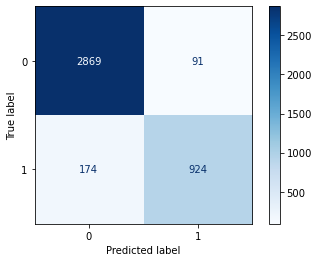

In [26]:
# Confusion Matrix Plot
metrics.plot_confusion_matrix(xgb_model, x_test, y_test, cmap = "Blues")
plt.show()

## Feature Importance

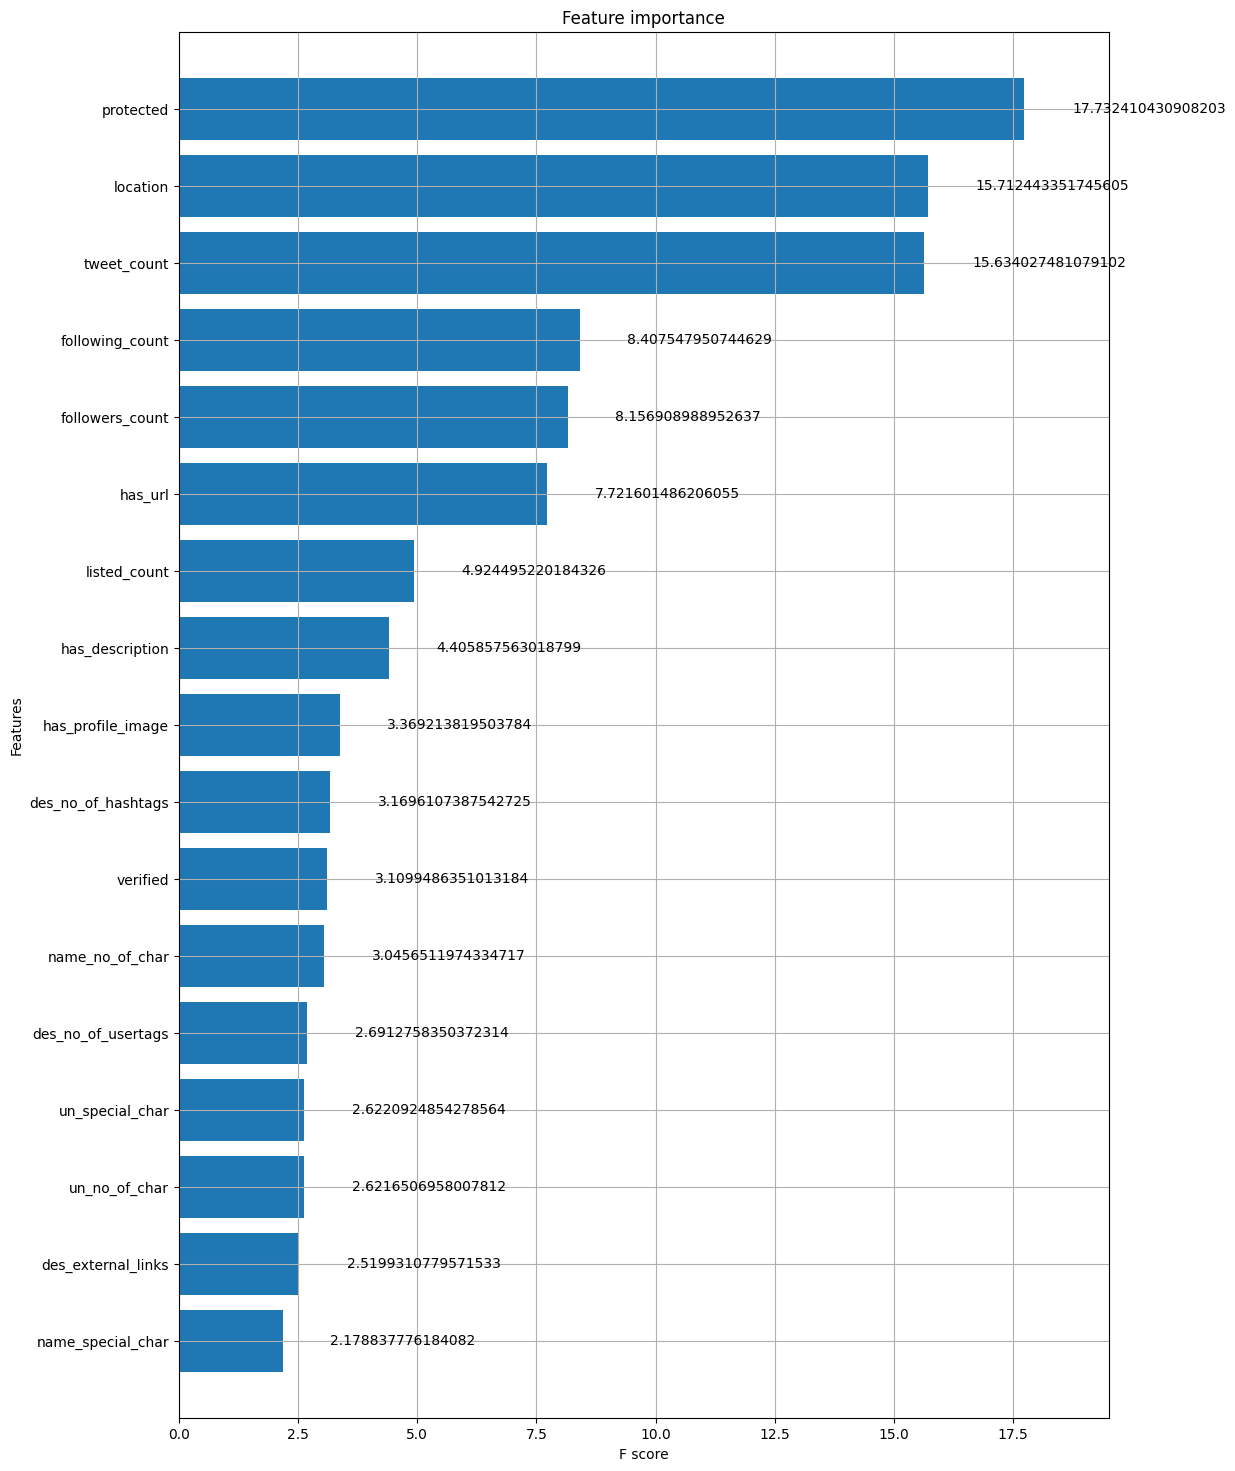

In [53]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_model, importance_type = 'gain', height=0.8, ax=ax)
plt.show()

In [54]:
# Local Level
shap.initjs()
explainer = shap.Explainer(xgb_model.predict_proba, x_train)
shap_values = explainer(x_test.iloc[[1302]])
shap_values = shap_values[...,1]
shap.plots.force(shap_values)

In [55]:
# df = pd.DataFrame(user, coluns=x_train.columns)
xgb_model.predict_proba(x_test.iloc[[1302]])

array([[0.9856363 , 0.01436369]], dtype=float32)

Permutation explainer: 4059it [07:02,  9.40it/s]                                


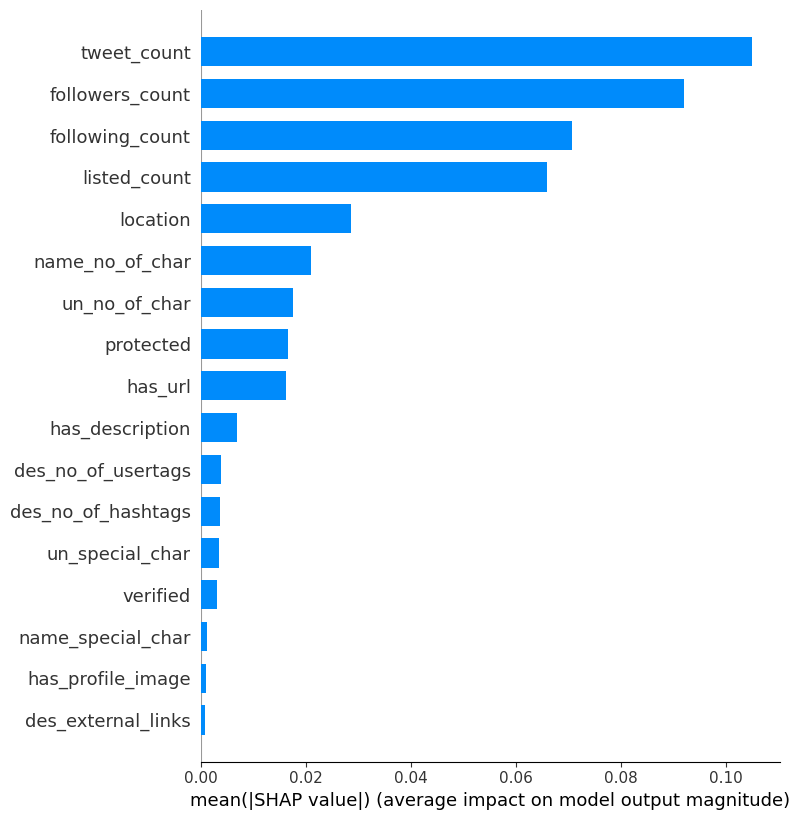

In [56]:
# Global Level
shap_values_global = explainer(x_test)
shap_values_global = shap_values_global[...,1]
shap.summary_plot(shap_values_global, feature_names = x_test.columns, plot_type = "bar", sort = True)

# Final Model
#### We now train the full dataset to be used as our final model.

In [57]:
df_metadata = pd.read_csv('metadata_dataset.csv')
df_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,isBot,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url
0,0,0,1,1959,2708,405158,157,1,0,6,0,12,0,0,0,0,1,1
1,0,0,0,371,0,33172,10,1,0,13,0,14,0,0,0,0,1,1
2,0,0,0,36,0,548,0,1,1,13,1,16,0,0,0,0,1,0
3,0,0,1,30,148,93,1,1,1,12,0,12,0,0,0,0,1,1
4,0,0,1,1089,2283,9098,34,1,0,10,0,14,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20284,0,0,1,72,76,4161,1,1,0,11,0,12,0,0,0,0,0,0
20285,0,0,0,314,107,20915,9,1,0,13,1,14,0,0,0,1,1,1
20286,0,0,1,2981,2523,4991,46,1,0,14,0,16,0,0,3,1,1,1
20287,0,0,0,170,180,7820,4,1,0,11,0,12,0,0,0,0,1,0


In [58]:
# Getting x and y
x = df_metadata.drop(columns = ['isBot'])
y = df_metadata['isBot']

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

numeric_variables = ['followers_count', 'following_count', 'tweet_count', 'listed_count', 'un_no_of_char', 'name_no_of_char', 'des_no_of_usertags', 'des_no_of_hashtags']

# Model Pipeline
class ExperimentalTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, numeric_variables = numeric_variables):
        self.encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
        self.scaler = StandardScaler()
        self.numeric_variables = numeric_variables
        self.columns = []
    
    def fit(self, X, y = None):
        # fit scaler on the numeric variables
        self.scaler.fit(X[self.numeric_variables])
        return self
    
    def transform(self, X, y = None):
        X_ = X.copy()
        # transforming the numeric variables according to the fitted scaler
        X_[self.numeric_variables] = self.scaler.transform(X_[self.numeric_variables])
        
        self.columns = X_.columns
        return X_

In [60]:
from sklearn.pipeline import make_pipeline

weight_final = df_metadata['isBot'].value_counts()[0] / df_metadata['isBot'].value_counts()[1]

params_xgb = results_grid_xgb.best_params_

xgb_classifier_final = XGBClassifier(gamma = 0.1,
                                       alpha = 0.5,
                                       max_depth = int(params_xgb['max_depth']), 
                                       eta = params_xgb['eta'], 
                                       subsample = params_xgb['subsample'],
                                       colsample_bytree = params_xgb['colsample_bytree'],
                                       scale_pos_weight = weight_train,
                                       objective = "binary:logistic",
                                       eval_metric = "logloss")

transformer = ExperimentalTransformer()
xgb_final_pipeline = make_pipeline(transformer, xgb_classifier_final)

In [17]:
%%time

xgb_final_model = xgb_final_pipeline.fit(x, y)

CPU times: user 11.3 s, sys: 169 ms, total: 11.5 s
Wall time: 4.61 s


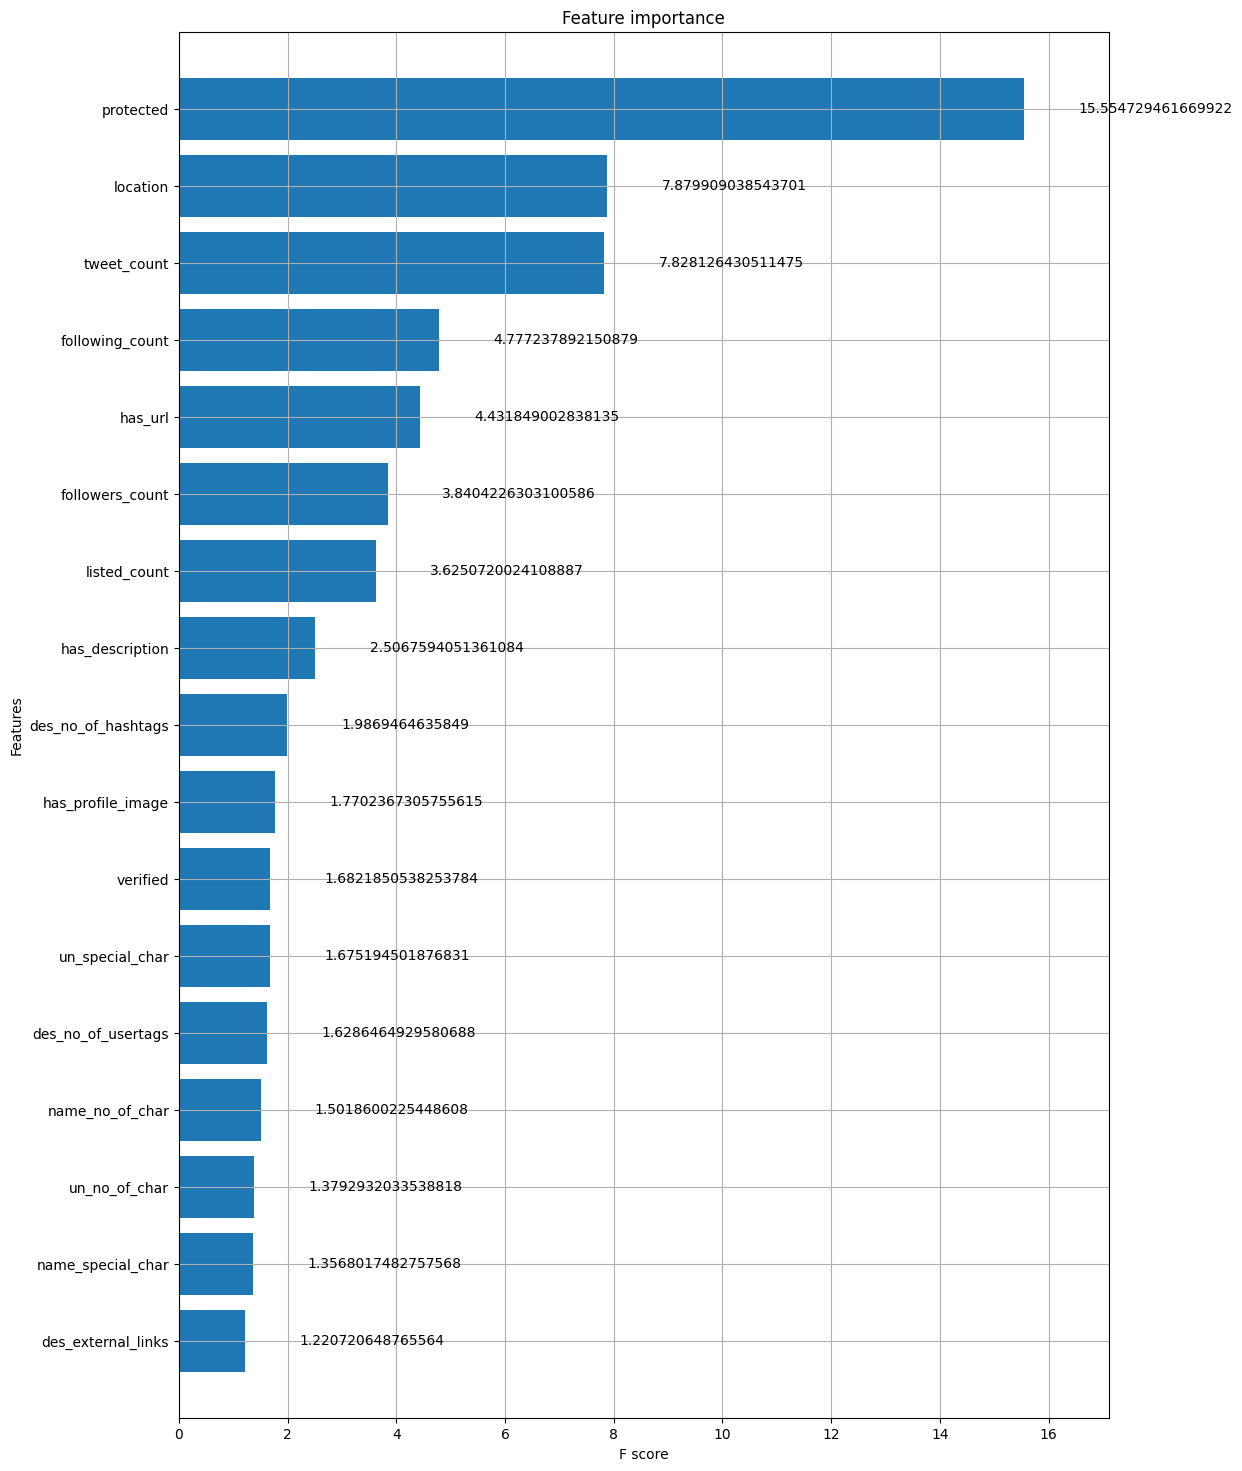

In [19]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_final_model.named_steps["xgbclassifier"], importance_type = 'gain', height=0.8, ax=ax)
plt.show()

In [74]:
# Local Level
shap.initjs()
explainer_final = shap.Explainer(xgb_final_model.predict_proba, x)
shap_values = explainer_final(x.iloc[[250]])
shap_values = shap_values[...,1]
shap.plots.force(shap_values)

In [30]:
# saving pickle files to be used in flask 
# filename = 'XGBoost.sav'
# pickle.dump(xgb_final_model, open(filename, 'wb'))
# filename = 'xgb_shap.sav'
# pickle.dump(explainer_final, open(filename, 'wb'))